# **Desmond Drug discovery**



[Desmonds Github](https://github.com/dessygil)

This project meant to be used to build a machine learning model using data from ChEMBL database to examine potential therapeutics for the target Protein-arginine deiminase type-1 (PADI4) by understanding the Bioactivity data.

---

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [2]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing libraries**

In [3]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for coronavirus**

In [4]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('PADI4')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Protein-arginine deiminase type-4,15.0,False,CHEMBL3407322,"[{'accession': 'Q9Z183', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'Q9UM07', 'xref_name': None, 'xre...",Homo sapiens,Protein-arginine deiminase type-4,14.0,False,CHEMBL6111,"[{'accession': 'Q9UM07', 'component_descriptio...",SINGLE PROTEIN,9606


### **Select and retrieve bioactivity data for *PADI4* (second Entry)**

In [5]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL6111'


Only retrieve bioactivity date for IC$_{50}$ values nM (nanomolar unit)

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)

In [8]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2085123,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,10.0
1,None,2085124,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,0.86
2,None,2085125,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,0.78


In [9]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [10]:
df.to_csv('bioactivity_data.csv', index=False)

## **Copying files to Google Drive**

In [11]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [12]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/PADI4"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/PADI4’: File exists


In [13]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/PADI4"

In [14]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/PADI4"

total 59
-rw------- 1 root root 53543 Feb  2 23:36 bioactivity_data.csv
-rw------- 1 root root  6492 Feb  1 00:47 bioactivity_preprocessed_data.csv


Let's see the CSV files that we have so far.

In [15]:
! ls

bioactivity_data.csv  gdrive  sample_data


Taking a glimpse of the **bioactivity_data.csv** file that we've just created.

In [16]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,2085123,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,,,BAO_0000190,BAO_0000357,single protein format,Nc1ccc(O)c(C(=O)O)c1,Outside typical range,"Values for this activity type are unusually large/small, so may not be accurate",CHEMBL1143172,Bioorg. Med. Chem.,2008.0,,CHEMBL704,MESALAMINE,CHEMBL704,,0,http://w

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [17]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2085123,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,10.0
1,None,2085124,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,0.86
2,None,2085125,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,0.78
3,None,2085126,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,0.1
4,None,2085127,[],CHEMBL929914,Inhibition of PAD4 by ABPP-based assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,mM,UO_0000065,None,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,None,19448999,[],CHEMBL4433160,Inhibition of recombinant human GST-tagged PAD...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,uM,UO_0000065,None,28.0
83,None,19449000,[],CHEMBL4433160,Inhibition of recombinant human GST-tagged PAD...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,uM,UO_0000065,None,8.8
84,None,19449001,[],CHEMBL4433160,Inhibition of recombinant human GST-tagged PAD...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,uM,UO_0000065,None,22.0
85,None,20635942,[],CHEMBL4611747,Inhibition of PAD4 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-arginine deiminase type-4,9606,None,None,IC50,nM,UO_0000065,None,50.0


Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [18]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Iterate the *molecule_chembl_id* to a list**

In [19]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

### **Iterate *canonical_smiles* to a list**

In [20]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### **Iterate *standard_value* to a list**

In [21]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [22]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'class', 'standard_value'])

In [23]:
df3

,molecule_chembl_id,canonical_smiles,class,standard_value
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,10000000.0
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,860000.0
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,780000.0
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,100000.0
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,620000.0
...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,28000.0
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,8800.0
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,22000.0
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,50.0


Save dataframe to CSV file

In [24]:
df3.to_csv('PADI4_bioactivity_preprocessed_data.csv', index=False)

In [25]:
! ls -l

total 72
-rw-r--r-- 1 root root 53543 Feb  2 23:35 bioactivity_data.csv
drwx------ 5 root root  4096 Feb  2 23:36 gdrive
-rw-r--r-- 1 root root  7317 Feb  2 23:37 PADI4_bioactivity_preprocessed_data.csv
drwxr-xr-x 1 root root  4096 Feb  1 14:33 sample_data


Let's copy to the Google Drive

In [26]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/PADI4"

cp: cannot stat 'bioactivity_preprocessed_data.csv': No such file or directory


In [27]:
! ls "/content/gdrive/My Drive/Colab Notebooks/PADI4"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


---

# **Exploratory Data Analysis**

we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [28]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-02 23:37:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   235MB/s    in 0.3s    

2023-02-02 23:37:27 (235 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [29]:
import pandas as pd

## **Load bioactivity data**

In [30]:
df = pd.read_csv('PADI4_bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,class,standard_value
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,10000000.0
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,860000.0
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,780000.0
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,100000.0
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,620000.0
...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,28000.0
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,8800.0
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,22000.0
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,50.0


In [31]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [32]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [33]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,class,standard_value,canonical_smiles
0,CHEMBL704,inactive,10000000.0,Nc1ccc(O)c(C(=O)O)c1
1,CHEMBL1433,inactive,860000.0,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...
2,CHEMBL1440,inactive,780000.0,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...
3,CHEMBL404520,inactive,100000.0,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...
4,CHEMBL1434,inactive,620000.0,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...
...,...,...,...,...
82,CHEMBL4468883,inactive,28000.0,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1
83,CHEMBL4449566,intermediate,8800.0,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1
84,CHEMBL4547728,inactive,22000.0,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1
85,CHEMBL4539512,active,50.0,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [34]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [35]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [36]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,153.137,0.67260,3.0,3.0
1,444.440,-0.34760,6.0,9.0
2,444.440,-0.21440,6.0,9.0
3,478.885,0.43900,6.0,9.0
4,457.483,0.18660,5.0,9.0
...,...,...,...,...
82,352.869,4.48197,3.0,2.0
83,387.314,5.13537,3.0,2.0
84,353.857,3.67257,2.0,4.0
85,473.577,3.14770,2.0,7.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [37]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,153.137,0.67260,3.0,3.0
1,444.440,-0.34760,6.0,9.0
2,444.440,-0.21440,6.0,9.0
3,478.885,0.43900,6.0,9.0
4,457.483,0.18660,5.0,9.0
...,...,...,...,...
82,352.869,4.48197,3.0,2.0
83,387.314,5.13537,3.0,2.0
84,353.857,3.67257,2.0,4.0
85,473.577,3.14770,2.0,7.0


In [38]:
df

,molecule_chembl_id,canonical_smiles,class,standard_value
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,10000000.0
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,860000.0
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,780000.0
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,100000.0
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,620000.0
...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,28000.0
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,8800.0
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,22000.0
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,50.0


Now, let's combine the 2 DataFrame

In [39]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [40]:
df_combined

,molecule_chembl_id,canonical_smiles,class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,10000000.0,153.137,0.67260,3.0,3.0
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,860000.0,444.440,-0.34760,6.0,9.0
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,780000.0,444.440,-0.21440,6.0,9.0
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,100000.0,478.885,0.43900,6.0,9.0
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,620000.0,457.483,0.18660,5.0,9.0
...,...,...,...,...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,28000.0,352.869,4.48197,3.0,2.0
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,8800.0,387.314,5.13537,3.0,2.0
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,22000.0,353.857,3.67257,2.0,4.0
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,50.0,473.577,3.14770,2.0,7.0


### **Convert IC50 to pIC50**

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [41]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [42]:
df_combined.standard_value.describe()

count    8.700000e+01
mean     1.128479e+06
std      2.766847e+06
min      3.981000e+01
25%      3.350000e+03
50%      2.800000e+04
75%      5.000000e+05
max      1.000000e+07
Name: standard_value, dtype: float64

In [43]:
-np.log10( (10**-9)* 100000000 )

1.0

In [44]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [45]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [46]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-45-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,153.137,0.67260,3.0,3.0,10000000.0
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,444.440,-0.34760,6.0,9.0,860000.0
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,444.440,-0.21440,6.0,9.0,780000.0
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,478.885,0.43900,6.0,9.0,100000.0
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,457.483,0.18660,5.0,9.0,620000.0
...,...,...,...,...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,352.869,4.48197,3.0,2.0,28000.0
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,387.314,5.13537,3.0,2.0,8800.0
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,353.857,3.67257,2.0,4.0,22000.0
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,473.577,3.14770,2.0,7.0,50.0


In [47]:
df_norm.standard_value_norm.describe()

count    8.700000e+01
mean     1.128479e+06
std      2.766847e+06
min      3.981000e+01
25%      3.350000e+03
50%      2.800000e+04
75%      5.000000e+05
max      1.000000e+07
Name: standard_value_norm, dtype: float64

In [48]:
df_final = pIC50(df_norm)
df_final

<ipython-input-41-bf09df1ccbf9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,153.137,0.67260,3.0,3.0,2.000000
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,444.440,-0.34760,6.0,9.0,3.065502
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,444.440,-0.21440,6.0,9.0,3.107905
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,478.885,0.43900,6.0,9.0,4.000000
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,457.483,0.18660,5.0,9.0,3.207608
...,...,...,...,...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,352.869,4.48197,3.0,2.0,4.552842
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,387.314,5.13537,3.0,2.0,5.055517
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,353.857,3.67257,2.0,4.0,4.657577
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,473.577,3.14770,2.0,7.0,7.301030


In [49]:
df_final.pIC50.describe()

count    87.000000
mean      4.508601
std       1.463274
min       2.000000
25%       3.301030
50%       4.552842
75%       5.475004
max       7.400008
Name: pIC50, dtype: float64

In [50]:
df_final.to_csv('PADI4_bioactivity_data_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**


In [51]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,153.137,0.67260,3.0,3.0,2.000000
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,444.440,-0.34760,6.0,9.0,3.065502
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,444.440,-0.21440,6.0,9.0,3.107905
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,478.885,0.43900,6.0,9.0,4.000000
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,457.483,0.18660,5.0,9.0,3.207608
...,...,...,...,...,...,...,...,...
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,352.869,4.48197,3.0,2.0,4.552842
83,CHEMBL4449566,N=C(CCl)NCCCc1nc(Cl)c(-c2cccc(-c3ccccc3)c2)[nH]1,intermediate,387.314,5.13537,3.0,2.0,5.055517
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,353.857,3.67257,2.0,4.0,4.657577
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,473.577,3.14770,2.0,7.0,7.301030


In [52]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,153.137,0.67260,3.0,3.0,2.000000
1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,444.440,-0.34760,6.0,9.0,3.065502
2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,444.440,-0.21440,6.0,9.0,3.107905
3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,478.885,0.43900,6.0,9.0,4.000000
4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,457.483,0.18660,5.0,9.0,3.207608
...,...,...,...,...,...,...,...,...
81,CHEMBL4464539,N=C(CCl)NCCCC(=O)NCc1cccc(-c2ccccc2)c1,inactive,343.858,3.55567,3.0,2.0,4.408935
82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,352.869,4.48197,3.0,2.0,4.552842
84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,353.857,3.67257,2.0,4.0,4.657577
85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,473.577,3.14770,2.0,7.0,7.301030


Let's write this to CSV file.

In [53]:
df_2class.to_csv('PADI4_biactivity_pIC50_no_intermediate.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [54]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

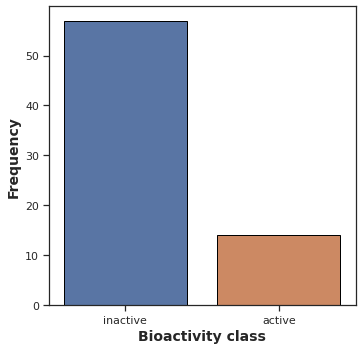

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

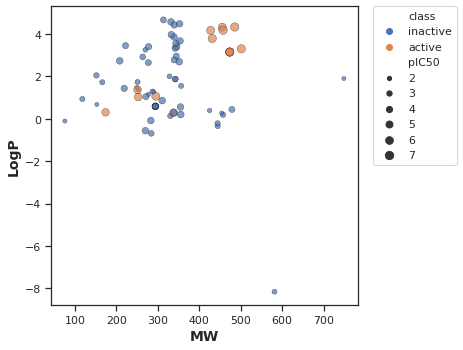

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

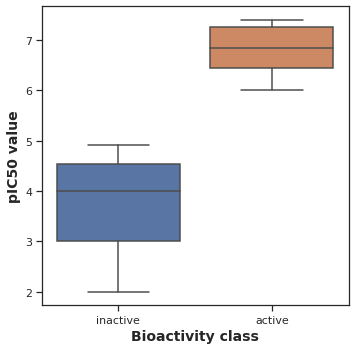

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [58]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [59]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,798.0,8.281244e-09,0.05,Different distribution (reject H0)


#### **MW**

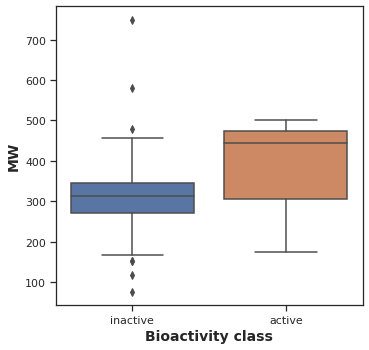

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

This is a little odd because it is normally the other way around but it could just be based off this certain target and the size it requires

In [61]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,563.5,0.017757,0.05,Different distribution (reject H0)


#### **LogP**

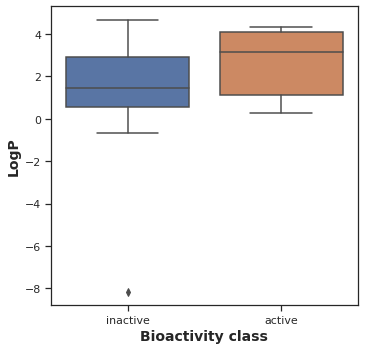

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [63]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,537.5,0.046068,0.05,Different distribution (reject H0)


The Solubility between both bioactivity classes is quite similar but accoriding the p value are still statistacally differet

#### **NumHDonors**

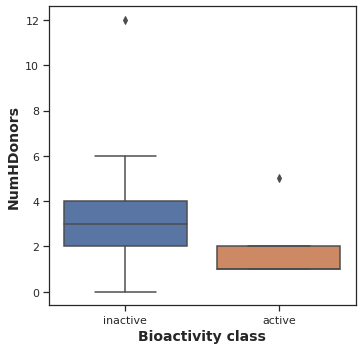

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [65]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,172.0,0.000862,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

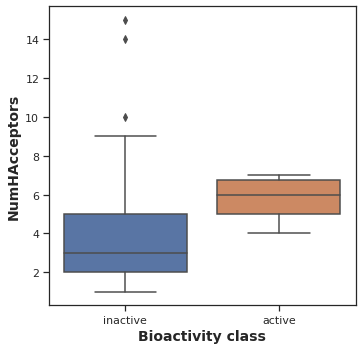

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [67]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,611.5,0.001906,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives** but not in the way that was totally expected as the more active compounds were a higher molecular weight.

## **Zip files**

In [68]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: bioactivity_data.csv (deflated 89%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: PADI4_biactivity_pIC50_no_intermediate.csv (deflated 71%)
  adding: plot_MW_vs_LogP.pdf (deflated 18%)
  adding: PADI4_bioactivity_data_pIC50.csv (deflated 75%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: PADI4_bioactivity_preprocessed_data.csv (deflated 79%)


# **Descriptor Calculation and Dataset Preparation**

We will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

---

## **Download PaDEL-Descriptor**

In [69]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-02-02 23:38:54--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-02-02 23:38:54--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-02-02 23:38:55 (167 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-02-02 23:38:55--  https://gi

In [70]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

In [89]:
df3 = pd.read_csv('/content/PADI4_biactivity_pIC50_no_intermediate.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,153.137,0.67260,3.0,3.0,2.000000
1,1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,444.440,-0.34760,6.0,9.0,3.065502
2,2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,444.440,-0.21440,6.0,9.0,3.107905
3,3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,478.885,0.43900,6.0,9.0,4.000000
4,4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,457.483,0.18660,5.0,9.0,3.207608
...,...,...,...,...,...,...,...,...,...
66,81,CHEMBL4464539,N=C(CCl)NCCCC(=O)NCc1cccc(-c2ccccc2)c1,inactive,343.858,3.55567,3.0,2.0,4.408935
67,82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,352.869,4.48197,3.0,2.0,4.552842
68,84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,353.857,3.67257,2.0,4.0,4.657577
69,85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,473.577,3.14770,2.0,7.0,7.301030


In [90]:
import pandas as pd

In [91]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [92]:
! cat molecule.smi | head -5

Nc1ccc(O)c(C(=O)O)c1	CHEMBL704
C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C(N)=O)=C(O)[C@@H](N(C)C)[C@@H]3[C@@H](O)[C@@H]21	CHEMBL1433
CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3C(=O)c4c(O)cccc4[C@@](C)(O)[C@H]3C[C@@H]12	CHEMBL1440
CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3C(=O)c4c(O)ccc(Cl)c4[C@@](C)(O)[C@H]3C[C@@H]12	CHEMBL404520
CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O)=C(C(N)=O)C(=O)[C@@]3(O)C(O)=C1C2=O	CHEMBL1434


In [93]:
! cat molecule.smi | wc -l

71


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [94]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [95]:
! bash padel.sh

Processing CHEMBL704 in molecule.smi (1/71). 
Processing CHEMBL1433 in molecule.smi (2/71). 
Processing CHEMBL1440 in molecule.smi (3/71). Average speed: 1.76 s/mol.
Processing CHEMBL404520 in molecule.smi (4/71). Average speed: 1.78 s/mol.
Processing CHEMBL1434 in molecule.smi (5/71). Average speed: 1.37 s/mol.
Processing CHEMBL22 in molecule.smi (6/71). Average speed: 1.28 s/mol.
Processing CHEMBL700 in molecule.smi (7/71). Average speed: 1.04 s/mol.
Processing CHEMBL443 in molecule.smi (8/71). Average speed: 0.95 s/mol.
Processing CHEMBL372795 in molecule.smi (9/71). Average speed: 0.97 s/mol.
Processing CHEMBL34259 in molecule.smi (10/71). Average speed: 0.78 s/mol.
Processing CHEMBL960 in molecule.smi (11/71). Average speed: 0.74 s/mol.
Processing CHEMBL1753 in molecule.smi (12/71). Average speed: 0.70 s/mol.
Processing CHEMBL529 in molecule.smi (13/71). Average speed: 0.65 s/mol.
Processing CHEMBL1542 in molecule.smi (14/71). Average speed: 0.63 s/mol.
Processing CHEMBL1523832 in

In [96]:
! ls -l

total 108884
-rw-r--r-- 1 root root   165359 Feb  2 23:59 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root    53543 Feb  2 23:35 bioactivity_data.csv
-rw-r--r-- 1 root root   137530 Feb  3 00:01 descriptors_output.csv
drwx------ 5 root root     4096 Feb  2 23:36 gdrive
drwxr-xr-x 3 root root     4096 Feb  2 23:39 __MACOSX
-rw-r--r-- 1 root root      120 Feb  2 23:38 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      118 Feb  2 23:38 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Feb  2 23:38 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      127 Feb  2 23:38 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      122 Feb  2 23:38 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root     4613 Feb  3 00:00 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Feb  2 23:38 padel.sh
-rw-r--r-- 1 root root 2576

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [97]:
df3_X = pd.read_csv('descriptors_output.csv')

In [98]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL704,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1433,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1440,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1434,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL404520,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,CHEMBL4464539,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,CHEMBL4468883,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,CHEMBL4547728,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,CHEMBL4539512,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [100]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,inactive,153.137,0.67260,3.0,3.0,2.000000
1,1,CHEMBL1433,C[C@H]1c2cccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(C...,inactive,444.440,-0.34760,6.0,9.0,3.065502
2,2,CHEMBL1440,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,444.440,-0.21440,6.0,9.0,3.107905
3,3,CHEMBL404520,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,inactive,478.885,0.43900,6.0,9.0,4.000000
4,4,CHEMBL1434,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,inactive,457.483,0.18660,5.0,9.0,3.207608
...,...,...,...,...,...,...,...,...,...
66,81,CHEMBL4464539,N=C(CCl)NCCCC(=O)NCc1cccc(-c2ccccc2)c1,inactive,343.858,3.55567,3.0,2.0,4.408935
67,82,CHEMBL4468883,N=C(CCl)NCCCc1ncc(-c2cccc(-c3ccccc3)c2)[nH]1,inactive,352.869,4.48197,3.0,2.0,4.552842
68,84,CHEMBL4547728,N=C(CCl)NCCCc1cn(-c2cccc(-c3ccccc3)c2)nn1,inactive,353.857,3.67257,2.0,4.0,4.657577
69,85,CHEMBL4539512,COc1cc(C(=O)N2CC[C@@H](O)[C@@H](N)C2)cc2nc(-c3...,active,473.577,3.14770,2.0,7.0,7.301030


In [102]:
df3_Y = df3['pIC50']
df3_Y

0     2.000000
1     3.065502
2     3.107905
3     4.000000
4     3.207608
        ...   
66    4.408935
67    4.552842
68    4.657577
69    7.301030
70    6.602060
Name: pIC50, Length: 71, dtype: float64

## **Combining X and Y variable**

In [103]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.065502
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.107905
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.207608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.408935
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.552842
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.657577
69,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.301030


In [106]:
dataset3.to_csv('PADI4_bioactivity_data__pIC50_pubchem_fp.csv', index=False)

# **Computational Drug Discovery Regression Models with Random Forest**


we will be building a regression model of PADI4 inhibitor using the random forest algorithm.

---

## **1. Import libraries**

In [107]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [108]:
df = pd.read_csv('/content/PADI4_bioactivity_data__pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.065502
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.107905
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.207608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.408935
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.552842
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.657577
69,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.301030


## **3. Input features**
The ***PADI4
*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [109]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [110]:
Y = df.pIC50
Y

0     2.000000
1     3.065502
2     3.107905
3     4.000000
4     3.207608
        ...   
66    4.408935
67    4.552842
68    4.657577
69    7.301030
70    6.602060
Name: pIC50, Length: 71, dtype: float64

### **3.3. Let's examine the data dimension**

In [111]:
X.shape

(71, 881)

In [112]:
Y.shape

(71,)

### **3.4. Remove low variance features**

In [113]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [114]:
X.shape

(71, 150)

## **4. Data split (80/20 ratio)**

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [116]:
X_train.shape, Y_train.shape

((56, 150), (56,))

In [117]:
X_test.shape, Y_test.shape

((15, 150), (15,))

## **5. Building a Regression Model using Random Forest**

In [118]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3767261410353634

In [119]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

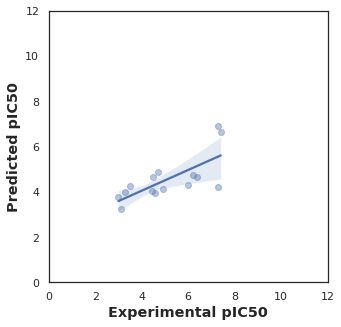

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Comparing Regressors**

we will be comparing several ML algorithms for build regression models of PADI4 inhibitors.



## **1. Import libraries**

In [121]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.4 MB/s 
     |████████████████████████████████| 297 kB 56.8 MB/s 
     |████████████████████████████████| 255.9 MB 31 kB/s 
     |████████████████████████████████| 2.0 MB 42.0 MB/s 
     |████████████████████████████████| 24.8 MB 143 kB/s 
     |████████████████████████████████| 38.1 MB 118 kB/s 


In [128]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [122]:
df = pd.read_csv('/content/PADI4_bioactivity_data__pIC50_pubchem_fp.csv')

In [123]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [124]:
# Examine X dimension
X.shape

(71, 881)

In [125]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(71, 150)

In [126]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [129]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:04<00:00, 10.28it/s]


[00:15:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  9.90it/s]

[00:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [130]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,23798607102507126030569146182230064601656789852...,-4110668499523957847230046368445158256841199010...,8701289754985125820584593728523468800.00,0.07
KernelRidge,6.91,-9.20,4.34,0.02
QuantileRegressor,1.58,-0.00,1.36,0.08
LassoLars,1.58,0.00,1.36,0.01
DummyRegressor,1.58,0.00,1.36,0.04
Lasso,1.58,0.00,1.36,0.02
ElasticNet,1.41,0.29,1.15,0.03
LassoLarsCV,1.36,0.37,1.07,0.06
OrthogonalMatchingPursuitCV,1.30,0.48,0.98,0.03


In [131]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,48138312131689583858983782892584694281624334640...,-4676293178506988485075851421027610626605474361...,43735683442065507608788470813972819575446448373...,0.05
KernelRidge,1.56,-4.41,4.70,0.01
GaussianProcessRegressor,1.40,-2.87,3.98,0.02
LassoLarsCV,1.19,-0.87,2.77,0.06
PassiveAggressiveRegressor,1.13,-0.23,2.25,0.02
DecisionTreeRegressor,1.11,-0.04,2.06,0.04
QuantileRegressor,1.10,-0.01,2.03,0.17
LassoLars,1.10,-0.00,2.02,0.02
Lasso,1.10,-0.00,2.02,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

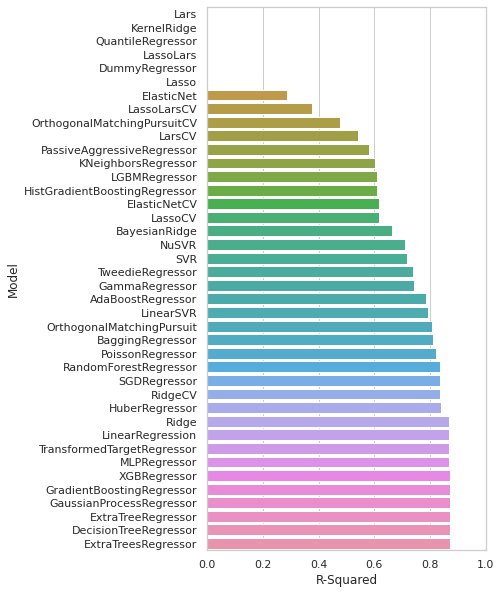

In [132]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

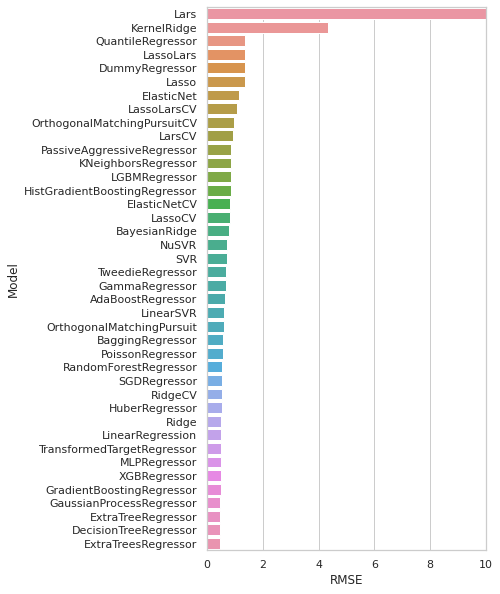

In [133]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

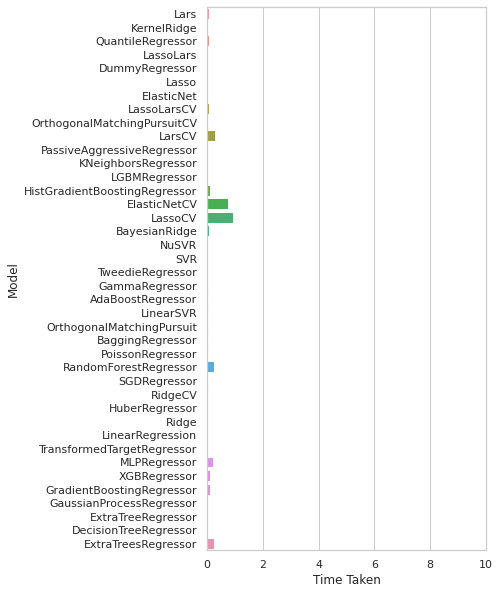

In [134]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))